# Final Project Nike

### Brock DeVolder & Mitchell Hogan

#### On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

## Section 1: Business Questions

#### How is Nike using Twitter to reach customers?
#### Who is talking about Nike?
#### How many “unique” or different users are talking about Nike?
#### Are there popular people talking about Nike?
#### What kind of products does Nike advertise/sell?
#### Which of these products are the most popular?
#### Where in the world is Nike being talked about? Only the US?
#### What are some of the popular terms & keywords in tweets about Nike?
#### How does Nike interact with customers on Twitter?
#### What do reviews say about Nike?
#### What are popular words/bigrams in the reviews about Nike?

## Section 2: Importing Data

In [1]:
import csv
import pandas as pd
import re
import json

#### Number of all tweets mentioning Nike; real-time tweets

In [2]:
import json

data = []

for line in open('nikedata1.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

print(len(data))

12009


#### 3400+ tweets from Nike's account

In [3]:
df = pd.read_csv("nike_sample_tweets1.csv")
df.head()

len(df)

3432

## Section: 3 Text Processing Nike Tweets

In [4]:
import csv
import pandas as pd
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

In [5]:
df = pd.read_csv('nike_sample_tweets1.csv')
df.head()

,Username,Tweet I.D.,Timestamp,Tweet
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ Apologies for the confusion, Landon. The Air Force 1 Flyknit 2.0 will release on 6.1. Check out our cur… https://t.co/CCsi0YKIUD"
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke Hey Gary, when one door closes another one opens. Meet the new most comfortable shoe you'll own. https://t.co/d784xWH4bA"
2,Nike,1.123510e+18,5/1/2019 8:45,"@JamezBlak @slyalubo @amasonic @_Sir_LeRoy @misskucheli We're glad to see you back in action, Heriju. The track is… https://t.co/6fUk3f8fSV"
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn Dreaming crazy since day one. 💭
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria It's official. Let's get to work. 🏃‍♀️


In [6]:
df['Tweet'] = df.Tweet.str.lower()
df.head(10)

,Username,Tweet I.D.,Timestamp,Tweet
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud"
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba"
2,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv"
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️
5,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?
6,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt
7,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh"
8,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf"
9,Nike,1.122770e+18,4/29/2019 7:46,"@prettyboyyfloyd rest assured, the air force 1 is here to stay."


#### Which tweets are original or are retweets?

In [7]:
df['retweet'] = df.Tweet.str.startswith("rt")
df.head(10)

,Username,Tweet I.D.,Timestamp,Tweet,retweet
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud",False
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba",False
2,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv",False
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭,False
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️,False
5,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?,False
6,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt,False
7,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh",False
8,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf",False
9,Nike,1.122770e+18,4/29/2019 7:46,"@prettyboyyfloyd rest assured, the air force 1 is here to stay.",False


#### What are the hashtags related with the tweets?

In [8]:
df['hashtags'] = df.Tweet.str.findall(r"(?<=#)\w+")
df.head(10)

,Username,Tweet I.D.,Timestamp,Tweet,retweet,hashtags
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud",False,[]
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba",False,[]
2,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv",False,[]
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭,False,[]
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️,False,[]
5,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?,False,[]
6,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt,False,[]
7,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh",False,[]
8,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf",False,[]
9,Nike,1.122770e+18,4/29/2019 7:46,"@prettyboyyfloyd rest assured, the air force 1 is here to stay.",False,[]


#### Are there any mentions inside of the tweets?

In [9]:
df.Tweet.str.findall("(?<=@)\w+").head()

0    [landon_p__]                                            
1    [garybohlke]                                            
2    [jamezblak, slyalubo, amasonic, _sir_leroy, misskucheli]
3    [chirag1patelinn]                                       
4    [liliteraria]                                           
Name: Tweet, dtype: object

In [10]:
df['mentions'] = df.Tweet.str.findall("(?<=@)\w+")
df.head(10)

,Username,Tweet I.D.,Timestamp,Tweet,retweet,hashtags,mentions
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud",False,[],[landon_p__]
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba",False,[],[garybohlke]
2,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv",False,[],"[jamezblak, slyalubo, amasonic, _sir_leroy, misskucheli]"
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭,False,[],[chirag1patelinn]
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️,False,[],[liliteraria]
5,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?,False,[],[sanchoymoi]
6,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt,False,[],[vanessalopicco2]
7,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh",False,[],[mmatumanuel]
8,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf",False,[],[jm_depp]
9,Nike,1.122770e+18,4/29/2019 7:46,"@prettyboyyfloyd rest assured, the air force 1 is here to stay.",False,[],[prettyboyyfloyd]


#### Cleaned Tweets

In [11]:
df['cleaned'] = df['Tweet']

In [12]:
df['cleaned'] = df.cleaned.str.replace('http\S+|www.\S+', '')
df['cleaned'] = df['cleaned'].str.replace("[^a-zA-Z]", " ")
df['cleaned'] = df.cleaned.str.findall('\w{3,}').str.join(' ')
df.head(10)

,Username,Tweet I.D.,Timestamp,Tweet,retweet,hashtags,mentions,cleaned
0,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud",False,[],[landon_p__],landon apologies for the confusion landon the air force flyknit will release check out our cur
1,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba",False,[],[garybohlke],garybohlke hey gary when one door closes another one opens meet the new most comfortable shoe you own
2,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv",False,[],"[jamezblak, slyalubo, amasonic, _sir_leroy, misskucheli]",jamezblak slyalubo amasonic sir leroy misskucheli glad see you back action heriju the track
3,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭,False,[],[chirag1patelinn],chirag patelinn dreaming crazy since day one
4,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️,False,[],[liliteraria],liliteraria official let get work
5,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?,False,[],[sanchoymoi],sanchoymoi here lend hand for assist with this can you send over image the hoodie
6,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt,False,[],[vanessalopicco2],vanessalopicco they here stay
7,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh",False,[],[mmatumanuel],mmatumanuel hola manuel encantados ayudarte podr enviarnos privado especificando que est ocurri
8,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf",False,[],[jm_depp],depp hola jos encantados ayudarte nike partir del soporte nike sport watch otras
9,Nike,1.122770e+18,4/29/2019 7:46,"@prettyboyyfloyd rest assured, the air force 1 is here to stay.",False,[],[prettyboyyfloyd],prettyboyyfloyd rest assured the air force here stay


In [13]:
df_count_user = df.groupby('Username').size().reset_index()
df_count_user.head()

,Username,0
0,Nike,3244
1,Nike Basketball,94
2,Nike Football,94


In [14]:
# how many unique users in the dataset

df_count_unique_user = df['Username'].value_counts()
df_count_unique_user.head()

Nike               3244
Nike Football      94  
Nike Basketball    94  
Name: Username, dtype: int64

In [15]:
# number of unique users

df_count_unique_user.shape

(3,)

#### Wordcloud displaying the popular words within the Tweets that Nike sends.

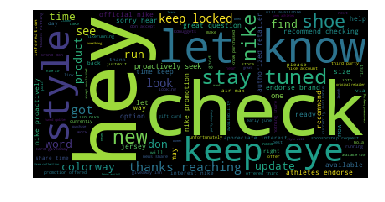

In [16]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud().generate(' '.join(df['cleaned']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### How has Nike been using Twitter?

In [17]:
df['time'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 9 columns):
Username      3432 non-null object
Tweet I.D.    3432 non-null float64
Timestamp     3432 non-null object
Tweet         3432 non-null object
retweet       3432 non-null bool
hashtags      3432 non-null object
mentions      3432 non-null object
cleaned       3432 non-null object
time          3432 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), object(6)
memory usage: 217.9+ KB


In [18]:
df1 = df.set_index(['time'])
df1.head(10)

,Username,Tweet I.D.,Timestamp,Tweet,retweet,hashtags,mentions,cleaned
time,,,,,,,,
2019-05-01 18:48:00,Nike,1.123660e+18,5/1/2019 18:48,"@landon_p__ apologies for the confusion, landon. the air force 1 flyknit 2.0 will release on 6.1. check out our cur… https://t.co/ccsi0ykiud",False,[],[landon_p__],landon apologies for the confusion landon the air force flyknit will release check out our cur
2019-05-01 15:36:00,Nike,1.123610e+18,5/1/2019 15:36,"@garybohlke hey gary, when one door closes another one opens. meet the new most comfortable shoe you'll own. https://t.co/d784xwh4ba",False,[],[garybohlke],garybohlke hey gary when one door closes another one opens meet the new most comfortable shoe you own
2019-05-01 08:45:00,Nike,1.123510e+18,5/1/2019 8:45,"@jamezblak @slyalubo @amasonic @_sir_leroy @misskucheli we're glad to see you back in action, heriju. the track is… https://t.co/6fuk3f8fsv",False,[],"[jamezblak, slyalubo, amasonic, _sir_leroy, misskucheli]",jamezblak slyalubo amasonic sir leroy misskucheli glad see you back action heriju the track
2019-04-30 20:33:00,Nike,1.123320e+18,4/30/2019 20:33,@chirag1patelinn dreaming crazy since day one. 💭,False,[],[chirag1patelinn],chirag patelinn dreaming crazy since day one
2019-04-30 14:04:00,Nike,1.123230e+18,4/30/2019 14:04,@liliteraria it's official. let's get to work. 🏃‍♀️,False,[],[liliteraria],liliteraria official let get work
2019-04-30 07:45:00,Nike,1.123130e+18,4/30/2019 7:45,@sanchoymoi here to lend a hand. for us to assist with this can you send over an image of the hoodie?,False,[],[sanchoymoi],sanchoymoi here lend hand for assist with this can you send over image the hoodie
2019-04-29 23:15:00,Nike,1.123000e+18,4/29/2019 23:15,@vanessalopicco2 they're here to stay. | https://t.co/z9yxhrirdt,False,[],[vanessalopicco2],vanessalopicco they here stay
2019-04-29 10:30:00,Nike,1.122810e+18,4/29/2019 10:30,"@mmatumanuel hola manuel, encantados de ayudarte. ¿podrías enviarnos un privado especificando lo que te está ocurri… https://t.co/tn38w7rfnh",False,[],[mmatumanuel],mmatumanuel hola manuel encantados ayudarte podr enviarnos privado especificando que est ocurri
2019-04-29 10:04:00,Nike,1.122800e+18,4/29/2019 10:04,"@jm_depp hola josé, encantados de ayudarte. nike a partir del 30/04 ya no da soporte al nike sport watch y otras te… https://t.co/0bqeltiwkf",False,[],[jm_depp],depp hola jos encantados ayudarte nike partir del soporte nike sport watch otras


#### How is Nike using twitter? 

In [19]:
#Monthly

m = df1.resample('M').size()
m[:10]

time
2013-09-30    4
2013-10-31    2
2013-11-30    0
2013-12-31    0
2014-01-31    0
2014-02-28    0
2014-03-31    2
2014-04-30    2
2014-05-31    0
2014-06-30    4
Freq: M, dtype: int64

In [20]:
#Yearly
y = df1.resample('Y').size()
y[:10]

time
2013-12-31    6   
2014-12-31    22  
2015-12-31    28  
2016-12-31    0   
2017-12-31    672 
2018-12-31    2237
2019-12-31    467 
Freq: A-DEC, dtype: int64

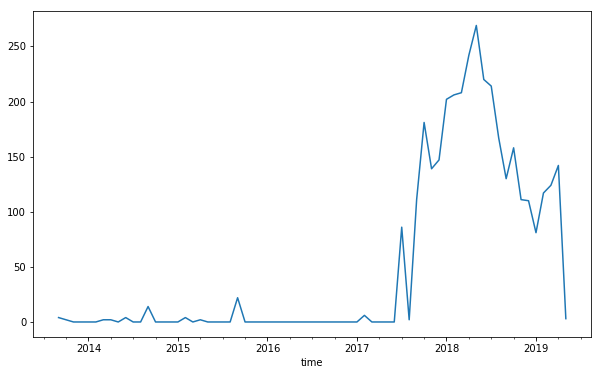

In [21]:
plt.figure(figsize=[10,6])
m.plot()

In [22]:
def f(x):
     return pd.Series(dict(Number_of_tweets = x['Tweet'].count(), 
                        ))

In [23]:
daily_count = df1.groupby(df1.index.date).apply(f)
print(len(daily_count))
daily_count[:10]

592


,Number_of_tweets
2013-09-14,2
2013-09-25,2
2013-10-21,2
2014-03-26,2
2014-04-24,2
2014-06-15,4
2014-09-01,14
2015-02-09,2
2015-02-23,2
2015-04-16,2


#### What days of the week does Nike tweet the most?

In [24]:
weekday_count = df1.groupby(df1.index.weekday).apply(f)
print(len(weekday_count))
weekday_count

# 0 : Monday , 1 : Tuesday , ...

7


,Number_of_tweets
time,
0,507
1,552
2,599
3,542
4,567
5,376
6,289


In [25]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count

,Number_of_tweets,day
time,,
0,507,Monday
1,552,Tuesday
2,599,Wednesday
3,542,Thursday
4,567,Friday
5,376,Saturday
6,289,Sunday


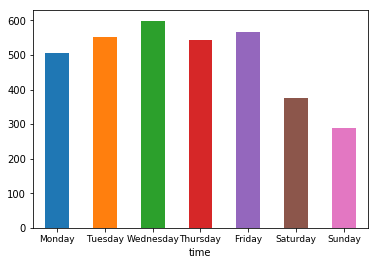

In [26]:
from pylab import*

day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 

savefig('day-of-week counts.png', bbox_inches='tight', dpi=300, format='png')

# Section 4: Text Processing Real-time Tweets 

In [27]:
texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

12009

In [28]:
# removing any error messages from Twitter API

tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)

12009

#### Who is talking about Nike?

In [29]:
#ten screen names talking about Nike

for i in data[:10]:
    print(i['user']['screen_name'])

Dw9K1ZMaePEu1gk
agsvecega
CoachFilzen
you_12345579
euoficialbr
_timbalada_
rapelang_tlou
liluzistevee
Catha_Ana
Zodilux


In [30]:
screen_names = [T['user']['screen_name'] for T in tweets]

#### How many "unique" or different user names are there talking about Nike?

In [31]:
from collections import Counter

c = Counter(screen_names)

In [32]:
len(c)

9477

#### Are there popular usernames talking about Nike?

In [33]:
c.most_common(10)

[('StockXLive', 94),
 ('Deadstocksnkrz1', 50),
 ('Zodilux', 45),
 ('ModernOwners', 44),
 ('RandomFindsShop', 44),
 ('MJ23_Chicago', 42),
 ('MakeAnOfferThen', 38),
 ('JustMightLook', 38),
 ('ReeeemixHQ', 35),
 ('IcySoleOnline', 28)]

#### What are popular hashtags about Nike?

In [34]:
hashtags = []

for tweet in texts:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i][0])

In [35]:
c = Counter(hashtags)
c.most_common(20)

[('#nike', 249),
 ('#Nike', 233),
 ('#CasterSemenya', 220),
 ('#shopmycloset', 187),
 ('#fashion', 135),
 ('#poshmark', 117),
 ('#UmSóCorinthians', 106),
 ('#NIKE', 98),
 ('#style', 87),
 ('#スニーカー', 54),
 ('#airmax', 49),
 ('#HumpdayGiveaway', 49),
 ('#ナイキ', 49),
 ('#AD', 37),
 ('#AirVaporMax', 33),
 ('#adidas', 32),
 ('#ad', 32),
 ('#airforce', 29),
 ('#jordan', 27),
 ('#ALL4ASU', 26)]

#### It appears that there is a lot of foreign language hashtags; how many tweets are in english?

In [36]:
english = []

# for loop

for i in tweets:
    if i['user']['lang'] =="en":
        english.append(i)
len(english)

8048

#### How many of the tweets about Nike are original tweets? How many are retweets?

In [37]:
originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

5884

In [38]:
# get retweets only

#remove original tweets

retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

6125

#### What are the popular URLS regarding Nike?

In [39]:
for T in tweets[:10]:
    for i in T['entities']['urls']:
        print(i['url'])

https://t.co/ei1wYgjqLS
https://t.co/ARVLqkn103
https://t.co/t8ypaO9gOU
https://t.co/DlR5SAAbJy
https://t.co/YO29sjwKNL


In [40]:
urls = []

for T in tweets:
    for i in T['entities']['urls']:
        urls.append(i['url'])        

In [41]:
#Top 10 URLs

c = Counter(urls)
c.most_common(20)

[('https://t.co/SsyiPxjNdG', 215),
 ('https://t.co/ei1wYgjqLS', 65),
 ('https://t.co/sOhoUprZxi', 48),
 ('https://t.co/3YGTiuNTjX', 46),
 ('https://t.co/BF0Tfkrr1b', 33),
 ('https://t.co/gs592kdaqx', 25),
 ('https://t.co/MO4ZAG3ybQ', 23),
 ('https://t.co/7L6m5Dinpo', 23),
 ('https://t.co/LgXs5CVrmF', 18),
 ('https://t.co/sOhoUpJAoQ', 18),
 ('https://t.co/2Wo1zt0CAD', 16),
 ('https://t.co/pU5wCUUTbW', 15),
 ('https://t.co/jvh0jxejVj', 15),
 ('https://t.co/AtjtGO8dLj', 14),
 ('https://t.co/aGg8NLvBNn', 14),
 ('https://t.co/3n5WixliS6', 14),
 ('https://t.co/j1NzaPDpO0', 13),
 ('https://t.co/v88sb512oW', 12),
 ('https://t.co/jHnRmD3ZFQ', 12),
 ('https://t.co/ESz7LE5CmW', 12)]

#### Where are some of the places in the world that people are talking about Nike?

In [42]:
for i in tweets[:20]:
    print(i['user']['location'])

Let’s meet at the summit
None
Appleton, WI
None
Campo Grande MS
Caçador-SC
Cape Town 
None
None
☑ Right Here
Birmingham, England
Davie, FL
None
Los Angeles, CA
Zimbabwe
None
Henderson, NV
Lagos, Nigeria
☑ Right Here
Astroworld


In [43]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
originaltweets = str(originaltweets)

#lowercase
tokens = originaltweets.lower()

#tokenize
tokens = tokens.split()

#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))

# Filter non-alphanumeric chars from tokens
tokens = (ch.lower() for ch in tokens if ch.isalpha())

#Create your bigrams
#bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)

In [44]:
fdist.most_common(25)

[('nike', 2302),
 ('air', 823),
 ('de', 357),
 ('size', 321),
 ('added', 307),
 ('closet', 302),
 ('max', 283),
 ('jordan', 275),
 ('via', 228),
 ('da', 206),
 ('que', 192),
 ('x', 169),
 ('react', 168),
 ('may', 168),
 ('new', 151),
 ('shoes', 145),
 ('e', 145),
 ('black', 143),
 ('good', 143),
 ('retro', 140),
 ('check', 131),
 ('like', 123),
 ('um', 123),
 ('white', 122),
 ('element', 119)]

#### Who are the most visible users talking about Nike?

In [45]:
for tweet in texts[:10]:
    print(tweet)

RT @cons_up: 많은 게 느껴지네. 사실 체형만은 '예쁘게 마른 아이돌'에 들어갈 수도 있겠지만(물론 더 다부짐) 포즈와 담아내는 시선에 따라 이렇게나 다르다. 인형이 아니라 사람처럼 보이잖아. https://t.co/ei1wYgjqLS
RT @sweatyhairy: I like those nike shirts that just say somethin like "FUCK SLEEP" or "HARDEST DICK IN THE ROOM" on the front
@awborresen @LUvikings @LawrenceUni Great post... except for the Under Armour logo... @LUCoachMike has to be so dis… https://t.co/ARVLqkn103
RT @Corinthians: #UmSóCorinthians

Na estreia do novo manto alvinegro, Timão vence Chapecoense pelo Brasileirão!

Compre já a nova camisa:…
@JornalismoWando Fico imaginando ele se preparando pra guerra, com tênis Nike, camiseta de marca, protetor solar, ó… https://t.co/t8ypaO9gOU
RT @Corinthians: #UmSóCorinthians

Na estreia do novo manto alvinegro, Timão vence Chapecoense pelo Brasileirão!

Compre já a nova camisa:…
RT @blessedkide5: @rapelang_tlou @nkulipp https://t.co/DlR5SAAbJy
RT @AuthAccountz: 25 FREE ACCOUNTS TO A RETWEET (MUST FOLLOW!)

🇺🇸U.S./🇬🇧U.K Verified Nike+/SNKRS accounts av

In [46]:
import re

for tweet in texts[:10]:
    print(re.findall(r"(?<=@)\w+", tweet))

['cons_up']
['sweatyhairy']
['awborresen', 'LUvikings', 'LawrenceUni', 'LUCoachMike']
['Corinthians']
['JornalismoWando']
['Corinthians']
['blessedkide5', 'rapelang_tlou', 'nkulipp']
['AuthAccountz']
['femaIepwr']
[]


In [47]:
for tweet in texts[:10]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print('@'+i)

@cons_up
@sweatyhairy
@awborresen
@LUvikings
@LawrenceUni
@LUCoachMike
@Corinthians
@JornalismoWando
@Corinthians
@blessedkide5
@rapelang_tlou
@nkulipp
@AuthAccountz
@femaIepwr


In [48]:
visible_users = []

for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i][0])

In [49]:
for i in visible_users[:10]:
    print(i)

@cons_up
@sweatyhairy
@awborresen
@LUvikings
@LawrenceUni
@LUCoachMike
@Corinthians
@JornalismoWando
@Corinthians
@blessedkide5


In [50]:
# 20 most visible users in this dataset

c = Counter(visible_users)
c.most_common(20)

[('@simonallison', 670),
 ('@Nike', 553),
 ('@ModernNotoriety', 264),
 ('@naofacaeusacar', 213),
 ('@faustaofashion', 175),
 ('@advancxd', 166),
 ('@HYPEBEAST', 125),
 ('@IGimports', 124),
 ('@ofutmundo', 124),
 ('@sweatyhairy', 122),
 ('@poshmarkapp', 121),
 ('@Poshmarkapp', 121),
 ('@Corinthians', 113),
 ('@SneakerNews', 108),
 ('@KicksDeals', 92),
 ('@swipathefox', 87),
 ('@Juezcentral', 81),
 ('@brkicks', 79),
 ('@J23app', 77),
 ('@nikestore', 77)]

#### Which user names talking about Nike have the most followers?

In [51]:
screen_names = [T['user']['screen_name'] for T in tweets if 'user' in T]
screen_names_description = [status['user']['description'] for status in tweets if 'user' in status]
followers_count = [status['user']['followers_count'] for status in tweets if 'user' in status]
friends_count = [status['user']['friends_count'] for status in tweets if 'user' in status]
screen_names_created = [status['user']['created_at'] for status in tweets if 'user' in status]
location = [status['user']['location'] for status in tweets if 'user' in status]

In [52]:
followers_friends = list(zip(screen_names, followers_count, friends_count))
for i in followers_friends[:10]:
    print(i)

('Dw9K1ZMaePEu1gk', 58, 216)
('agsvecega', 118, 177)
('CoachFilzen', 254, 179)
('you_12345579', 1, 27)
('euoficialbr', 20, 124)
('_timbalada_', 1828, 1918)
('rapelang_tlou', 6683, 7157)
('liluzistevee', 10, 50)
('Catha_Ana', 402, 218)
('Zodilux', 1256, 2)


In [53]:
# this is another way to find out screen name, follower count, and friends count

for tweet in tweets[:10]:
    print(tweet['user']['screen_name'], tweet['user']['followers_count'], tweet['user']['friends_count'])

Dw9K1ZMaePEu1gk 58 216
agsvecega 118 177
CoachFilzen 254 179
you_12345579 1 27
euoficialbr 20 124
_timbalada_ 1828 1918
rapelang_tlou 6683 7157
liluzistevee 10 50
Catha_Ana 402 218
Zodilux 1256 2


In [54]:
# saving every user and his/her follower counts

user_followerscount = []

for tweet in tweets:
    user_followerscount.append([tweet['user']['screen_name'], tweet['user']['followers_count']]) 
    
user_followerscount[:10]

[['Dw9K1ZMaePEu1gk', 58],
 ['agsvecega', 118],
 ['CoachFilzen', 254],
 ['you_12345579', 1],
 ['euoficialbr', 20],
 ['_timbalada_', 1828],
 ['rapelang_tlou', 6683],
 ['liluzistevee', 10],
 ['Catha_Ana', 402],
 ['Zodilux', 1256]]

In [55]:
from operator import itemgetter

sorted(user_followerscount,key=itemgetter(1), reverse=True)[:10]

[['nikestore', 4577338],
 ['nikestore', 4577269],
 ['nikestore', 4577258],
 ['nikestore', 4577248],
 ['nikestore', 4577239],
 ['HotNewHipHop', 1088166],
 ['HotNewHipHop', 1088126],
 ['SacramentoKings', 1031399],
 ['kicksonfire', 909073],
 ['kicksonfire', 909045]]

# Section 5: Selenium Web Crawling Nike Product Reviews

In [58]:
from selenium import webdriver

In [60]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
driver.quit()

In [63]:
#Reviews 1

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent")

#for i in range(1,10):
for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review1 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review1)

Nike 😍 my favorite brand not only shoes , it has an excellent athletic products that i have been using .
We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.
I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better
Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo cas

In [64]:
#Reviews 2

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=2")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review2 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review2)

I have a lot of sneakers from them, and the heel part of the shoe always ends up getting holes in the back part of the shoe after a month of wearing a few times a week
All of my Nike shoes have lasted years. I love the various styles and the comfort that every shoe has. Their sneakers are my gym go to! Tons of different styles for everyone’s needs. Highly recommend Nike brand!
I purchase a lot of my trainers from Nike, they fit comfortably and provide enough support throughout the day. Tn’s and 97’s are my go to for work and long days out.
Nike is very very good brands . I like this brand very..Has high quality.i love it....i recommend this brand ....
Great quality items. Sometimes just a little pricey. The Nike outlet is reasonable and they do offer military discount which is great. Nike footwear tends to be very comfortable and the clothing is very comfortable work out gear. I recommend Nike .
i wear nike pro leggings everyday in college! best pair of quality leggings . only problem 

In [65]:
#Reviews 3

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=3")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review3 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review3)

Me encanta siempre que voy estoy segura que no saldré con las manos vacías, los diseños son estupendos y los precios muy accesibles, y todo sin excepción es muy cómodo 
Nike's quality is consistent. I have worn their running shoe the Pegasus for 6 years now and every new pair is always amazing.
I love nike products, I bought a pair of running shorts that lasted me for almost 3 years and they've been my favorite comfy shorts for a while. I also love getting hats and sports bras because of how good the quality is. I recommend Nike brand 100%
Nike is usually one of the top brands I tend to gravitate to when it comes to athletic and leisure clothing. They are always made with the best quality and always right on trend. I also really love that I can always find a great range in pricing.
Es una marca que se caracteriza por sus bueno productos. Resistentes a todo y su gran durabilidad ademas sus precios son muy accesibles en le mercado. Tiene variedad de colores y preferencias. Super recomend

In [66]:
#Reviews 4

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=4")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review4 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review4)

Nike is awesome my #1 favorite Brand😊👍Awesome sneakers clothing hats everything😻😍I love there huarache's 😍😍😍 and there leggings are just perfect😻 I love it 😃of course it does not need improvement its perfect❤of course I would shop here again
Nike is amazing! The shoes are great, the athletic wear is amazing, and Nike overall is such an amazing brand! The prices can sometimes be steep, but the quality of their items make it worth the price!
My absolutely favorite sport brand, almost all of my leggings, shoes, sport bras are from here
I bought a nike leggeing and it is so comfortable and it makes the body look amazing i love the nike products they are fancy
i always get nike running shoes. they’re always so cute and comfortable. never disappointed in nike. i love their trash spikes. i’ve only ever used them and they’re always long lasting and in a variety of cute colors. i’m wearing nike’s now!!
I love all of the Nike pro products like leggings or spandex. By far my favorite athletic wea

In [67]:
#Reviews 5

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=5")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review5 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review5)

Nike has always been the only brand of tennis shoes I have never worn they have and all white high-top sneaker that I fell in love with 20-plus years ago! Believe or not all white high tops and I mean all White are next to impossible to find but Nike has them and Nike sneakers are and always have been top quality sneakers!
I have always loved Nike, the quality is always something you can count on with this brand and you will definitely love their shoes. They are just the most comfortable ever. I have had many pairs of their shoes and I only threw them away when I completely destroyed them by walking on them everyday! 8/10 would recommend.
Nike has always had my heart and I love how minimalistic their clothing is. I’ve had a few tops and leggings from them that are always the most comfortable items in my closet. I could live in them forever. I wish they were that expensive so I could continue to always buy from them but the few I have are enough to feed my crave for Nike. Don’t even get

In [69]:
#Reviews 6

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=6")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review6 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review6)

In love Nike, everything they have from clothing to shoes I buy it all. I've been a loyal Nike customer since I was a kid and don't plan on stopping anytime soon.
Nike has never let me down! Their shoes are phenomenal with great support! When you walk a lot or plan to be on your feet for long periods of time I highly suggest investing in a good quality tennis shoe. I have multiple pairs that I’ve had for years and the quality is still there.
They are light and so comfortable. When I was a retail manager, I had to be on my feet 10 hours a day. Only shoe I never had to break in.
Love it has nice shoes and also clothes my favorite purchase were some nike leggings
Nike makes the best sport/workout items. I love their clothes especially their leggings. I can run and they always stay up. Their shoes are very comfortable and last a long time. Nike is a bit pricey but your paying for the high quality items so its worth it.
Other than one other brand, Nike is the only tennis shoe I wear. They a

In [70]:
#Reviews 7

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=7")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review7 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review7)

Recently bought Nike sneakers and I love them! They’re so comfortable and they were a good price too! Always has sales no matter what time of the year you go! Very good products as well. Definitely will continue to shop here!
Love Nike trainers, always well made and long lasting. Great for kids trainers too, my son loves them.
They’re expensive but worth it. Good quality shoes and clothing. They’re not obnoxious with their labels like some name brands can be.
I love nike products. My cleats are beautiful and nice. My hoodie is really comfortable and warm. The quality of nike is really good, especially since the price is not even that high.
Not a big fan of their unethical labour practices. The quality is questionable depending on the product, colour variations are usually black and white or shades of grey unless you’re buying dunks or Jordan’s. Women’s clothing is very predictable, boring, and usually always has something pink involved.
I mostly use it to buy sneakers for me and my boy

In [71]:
#Reviews 8

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=8")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review8 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review8)

I really like Nike their clothes are very comfortable their shoes are very comfortable and if you go to the Nike outlet you’re going to get a really good deal
I do love Nike. I uses to not like them until I tried in a pair of their nike knit fit shoes and let me tell you... they’re my favorite shoes. They’re so comfy. They fit like socks. They match all my little workout outfits and they’re just so damn adorable. I hope they never stop making them.
I run a lot, so workout clothes is important to me. The leggings stay up and don’t fall down when I run, which is one of my main things I look for when I buy leggings. There are many styles that is for everyone. I would recommend this brand to anyone
Nike is only ok. The quality of their merchandise has really gone down hill in the last 20 years. Crappy quality for double the price??? No thanks. 
This brand is one of a kind ! The quality is amazing and Kind of expensive but worth it
Love their trainers, very comfortable, a little bit expensi

In [72]:
#Reviews 9

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=9")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review9 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review9)

Great products, a little pricey but it’s amazing. It’s one of the stores I shop at a lot. It would be nice if there were smaller sizes! ❤️💯⭐️
I have been a repeat customer of Nike. I love my super comfy, lightweight running shoes, my high top Jordans and Air Force 1’s. I gave a star off because they are a bit pricey but hey its Nike.
Nike shoes are very comfortable! I really like them, and they are pretty affordable, too! I have bought their lifestyle and running shoes for a couple years now, and every pair I have gotten has worked out for me! I would recommend this store.
Love the sneakers but they are so dang expensive. Most of my Nike sneakers really last though so I don’t totally mind the price
The ONLY trainer brand I own. Comfortable, stylish and always creating new styles. Even with Nike ID such a good touch to personalise items. Pros - comfort and style. Cons - can be quite expensive especially if buying trainers regularly
Nike is my favourite sports brand and I shop here very 

In [73]:
#Reviews 10

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=10")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    review10 = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    #stars = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(review10)

Love Nike one of my favorite sports brands really dear but worth it not a big fan of there new trainers thought would rather their old air max some of the clothes and shoes are really expensive and ain’t even nice
Love the shoe fit and the design is great, but for the price I paid I think they could be made with a better quality. My shoes only last 1 year and I only wear them while working out, never for a random day.
Nike ❤️💎🔥 my favorite brand for life, I love clothes but especially my favorite Nike tennis shoes and it's the brand I grew up with, good quality and good prices!
Always my favourite sport shoe brand when I'm looking for a great quality product for the amount of wear and tear I put my exercise apparel through.
Absolutely love Nike! They have really nice products! Its very affordable! They have the best shoes and active wear.
Amazing quality of athletic wear. You can really buy anything even if you don’t workout or play sports. It’s very comfortable and breathable if you d

In [75]:
#Amount of Stars 1

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars1 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars1)

5
None
4
5
5
4
5
5
5
5


In [76]:
#Amount of Stars 2

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=2")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars2 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars2)

3
5
5
5
3
4
5
5
5
5


In [77]:
#Amount of Stars 3

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=3")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars3 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars3)

5
5
5
5
5
5
5
5
4
5


In [78]:
#Amount of Stars 4

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=4")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars4 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars4)

5
5
5
5
5
5
5
5
2
5


In [79]:
#Amount of Stars 5

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=5")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars5 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars5)

5
4
5
5
5
5
5
None
5
5


In [80]:
#Amount of Stars 6

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=6")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars6 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars6)

5
5
5
5
5
5
5
2
5
5


In [81]:
#Amount of Stars 7

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=7")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars7 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars7)

5
5
5
4
3
5
5
None
5
5


In [82]:
#Amount of Stars 8

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=8")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars8 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars8)

5
5
5
2
5
5
5
5
5
5


In [83]:
#Amount of Stars 9

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=9")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars9 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars9)

5
4
4
3
5
5
5
3
5
5


In [84]:
#Amount of Stars 10

driver = webdriver.Firefox(executable_path=r'C:/Downloads/geckodriver.exe')  #change this line
driver.get("https://www.influenster.com/reviews/nike?review_sort=most+recent&review_page=10")

for review in driver.find_elements_by_xpath("//div[@class='content-item-body review-item-body']"):
    #review = review.find_element_by_xpath("div[@class='content-item-text review-text']").text
    #date = review.find_element_by_xpath("div[1]/a[1]").text
    stars10 = review.find_element_by_xpath("div[2]/div").get_attribute('data-stars')
    print(stars10)

4
5
5
5
5
5
5
4
5
5


# Secion 6: Sentiment Analysis Bing Liu

In [85]:
#import packages
import nltk
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [95]:
openfile = open("nike_reviews.csv", "r")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "r").read().splitlines()
negative_words = open("data/negative-words.txt", "r").read().splitlines()

positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [96]:
#list positive, negative, and neutral reviews
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

88
3
10


#### According to Bing Liu Analysis, there are 88 positive reviews, 3 negative reviews, and 10 neutral reviews.

In [178]:
# import text data (csv) as a dataframe

import re
import pandas as pd

import nltk
from nltk.corpus import stopwords

df2 = pd.read_csv("nike_reviews1.csv", header=None)
df2.head(5)

,0
0,"Nike ?? my favorite brand not only shoes , it has an excellent athletic products that i have been using ."
1,We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.
2,I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better
3,"Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo casual ????"
4,No he has good things for kids women and men and they also have a good clearance rack if you really look


In [179]:
df2 = df.rename(columns={0: 'Review'})
df2.head(5)

,Review
0,"Nike ?? my favorite brand not only shoes , it has an excellent athletic products that i have been using ."
1,We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.
2,I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better
3,"Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo casual ????"
4,No he has good things for kids women and men and they also have a good clearance rack if you really look


In [180]:
#Pattern

In [181]:
# create a new column with pattern sentiment score-sentiment,subjectivity
from pattern.en import sentiment
sen= sentiment

df2['p_sent_score'] = df2['Review'].apply(lambda x: sen(x))
df2.head(5)

,Review,p_sent_score
0,"Nike ?? my favorite brand not only shoes , it has an excellent athletic products that i have been using .","(0.5, 1.0)"
1,We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.,"(0.25010256410256415, 0.5923333333333334)"
2,I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better,"(0.2358024691358024, 0.3827160493827161)"
3,"Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo casual ????","(-0.25000000000000006, 0.5833333333333334)"
4,No he has good things for kids women and men and they also have a good clearance rack if you really look,"(0.5333333333333333, 0.46666666666666673)"


In [182]:
#convert pattern sentiment score column to string
df2['p_sent_score'] = df2['p_sent_score'].astype(str)

In [183]:
#remove paraenthensis from pattern sentiment score
df2['p_sent_score'] = df2['p_sent_score'].map(lambda x: x.lstrip("(/)"))

In [184]:
#create a new dataframe with pattern sentiment scores
p_sent_score = df2['p_sent_score'].str.split(",", n = 1, expand = True)

In [185]:
#remove last parenthesis from pattern sentiment score
p_sent_score[1] = p_sent_score[1].astype(str).str[:-1]

In [186]:
#create separate columns for pattern sentiment and subjectivity scores
p_sent_score= p_sent_score.rename(columns= {0:'p_sent', 1:'p_subj_score'})

In [187]:
#merge pattern sentiment scores to dataframe
df2=pd.merge(df2,p_sent_score,left_index=True, right_index=True)

In [188]:
#remove unnecessary column
df2 = df2.drop('p_sent_score', 1)
df2.head(5)

,Review,p_sent,p_subj_score
0,"Nike ?? my favorite brand not only shoes , it has an excellent athletic products that i have been using .",0.5,1.0
1,We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.,0.25010256410256415,0.5923333333333334
2,I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better,0.2358024691358024,0.3827160493827161
3,"Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo casual ????",-0.25000000000000006,0.5833333333333334
4,No he has good things for kids women and men and they also have a good clearance rack if you really look,0.5333333333333333,0.46666666666666673


In [189]:
#change pattern sentiment score to float
df2['p_sent'] = df2['p_sent'].astype(float)

In [190]:
#display descriptive statistics of pattern sentiment score
df2['p_sent'].describe()

count    101.000000
mean     0.319914  
std      0.214610  
min     -0.258519  
25%      0.204040  
50%      0.337500  
75%      0.485000  
max      0.800000  
Name: p_sent, dtype: float64

#### The mean pattern sentiment score is .32, the minimum is -0.26, and the maximum is 0.80

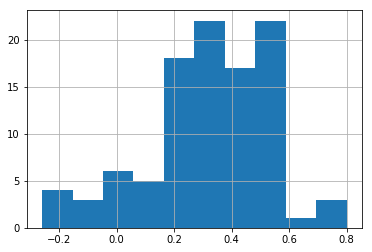

In [191]:
#show pattern sentiment histogram
df2['p_sent'].hist()

#### Most pattern sentiment scores are between 0.175 and .58

In [192]:
#change pattern subjectivity score to float
df2['p_subj_score'] = df2['p_subj_score'].astype(float)

In [193]:
#display descriptive statistics of pattern subjectivity score
df2['p_subj_score'].describe()

count    101.000000
mean     0.594202  
std      0.184303  
min      0.000000  
25%      0.483838  
50%      0.612500  
75%      0.700000  
max      1.000000  
Name: p_subj_score, dtype: float64

#### The mean pattern subjectivity score is .59, the minimum is 0, and the maximum is 1.

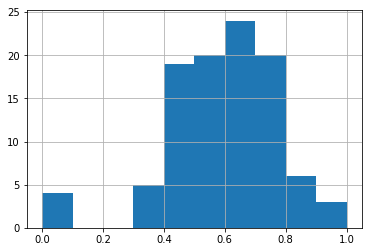

In [194]:
#show pattern subjectivity histogram
df2['p_subj_score'].hist()

#### Most subjectivity scores are between 0.40 and 0.80

# Section 7: Sentiment Analysis Vader

In [195]:
#create new sentiment score column
df2['v_sent_score']=df2['Review'].apply(lambda x: vs.polarity_scores(x)['compound'])
df2.head(5)

,Review,p_sent,p_subj_score,v_sent_score
0,"Nike ?? my favorite brand not only shoes , it has an excellent athletic products that i have been using .",0.500000,1.000000,0.7941
1,We love Nike in our house. And 100% support their campaign. My son wears Nike almost everyday. The quality of the clothes and shoes are outstanding. They last for a really long time. The airwick material drys fast. While it is a bit pricey but in this case you pay for what you get. I just recently bought a Nike bathing suit and its amazing. Very high quality compared to most bathing suits and its super cute. I would highly recommend. And will be buying again.,0.250103,0.592333,0.9766
2,I like nike I really do however sometimes I feel like the quality has gone down some. I dont like to feel as if I'm just paying for a name I actually want good quality clothes if I'm spending a lot of money. Some shirts that I have just dont last and the shoes also seem to get run down quick. Their kids clothes seem to fair a lot better,0.235802,0.382716,0.9313
3,"Amo sus maletas, mochilas, tenis, short. Aunque sea deportivo, combina muy bien con algo casual ????",-0.250000,0.583333,0.4137
4,No he has good things for kids women and men and they also have a good clearance rack if you really look,0.533333,0.466667,0.5574


In [196]:
#display descriptive statistics of vader sentiment score
df2['v_sent_score'].describe()

count    101.000000
mean     0.687813  
std      0.407128  
min     -0.833400  
25%      0.599400  
50%      0.865800  
75%      0.936300  
max      0.988100  
Name: v_sent_score, dtype: float64

#### The mean vader sentiment score is 0.69, the minimum is -0.83, and the maximum is 0.99

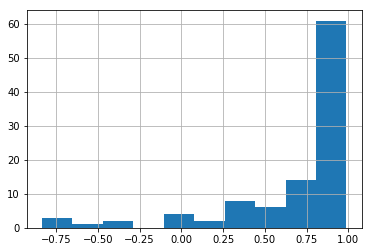

In [197]:
#show vader sentiment histogram
df2['v_sent_score'].hist()

#### Most reviews are between .75 and 1-very positive.

In [198]:
#change review column to string
df2['Review'] = df2['Review'].astype(str)

In [201]:
#clean reviews
df2['Review'] = df2['Review'].str.lower()
df2['Review']=df2['Review'].str.replace(r'(@\w+)', ' ')
df2['Review'] = df2['Review'].str.replace('http\S+|www.\S+', '')
df2['Review']=df2.Review.str.replace('[^a-zA-Z]', ' ')
df2['Review']=df2.Review.str.findall('\w{4,}').str.join(' ')
df2['Review']=df2.Review.str.replace('\d+', '')
df2['Review'].head(5)

0    nike favorite brand only shoes excellent athletic products that have been using                                                                                                                                                                                                                                                       
1    love nike house support their campaign wears nike almost everyday quality clothes shoes outstanding they last really long time airwick material drys fast while pricey this case what just recently bought nike bathing suit amazing very high quality compared most bathing suits super cute would highly recommend will buying again
2    like nike really however sometimes feel like quality gone down some dont like feel just paying name actually want good quality clothes spending money some shirts that have just dont last shoes also seem down quick their kids clothes seem fair better                                                                             
3   

# Section 8: Word Frequency Analysis All Reviews

In [236]:
#remove stopwords
stop =  ['take', 'make','like', 'even', 'would', 'really', 'first', 'much', 'made', 'well', 'ever', 'many', 'also', 'could', 'think', 'know', 'every', 'still', 'something', 'makes', 'look', 'thing', 'going', 'only', 'time', 'this', 'there', 'them', 'from', 'have', 'always', 'their', 'they', 'though', 'back', 'nike']
df2['Review']=df2.Review.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df2['Review'].head(1)

0    favorite brand shoes excellent athletic products that been using
Name: Review, dtype: object

In [237]:
#conduct word frequency analysis
fdist = list(Counter(" ".join(df2['Review']).split(" ")).items())
# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])


wordlist = pd.DataFrame(freq_word)

In [238]:
#rename columns and list words by greatest frequency
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
wordlist.reset_index(drop=True, inplace=True)
wordlist.sort_values(by='freq', ascending=False).head(50)

,word,freq
2,shoes,60
9,love,57
16,quality,42
87,comfortable,31
35,very,31
1,brand,28
58,good,26
6,that,26
84,great,23
88,wear,16


In [248]:
#create a list of most frequent words to plot
word_plot=wordlist.sort_values('freq',ascending=False)
word_plot=word_plot.head(25)

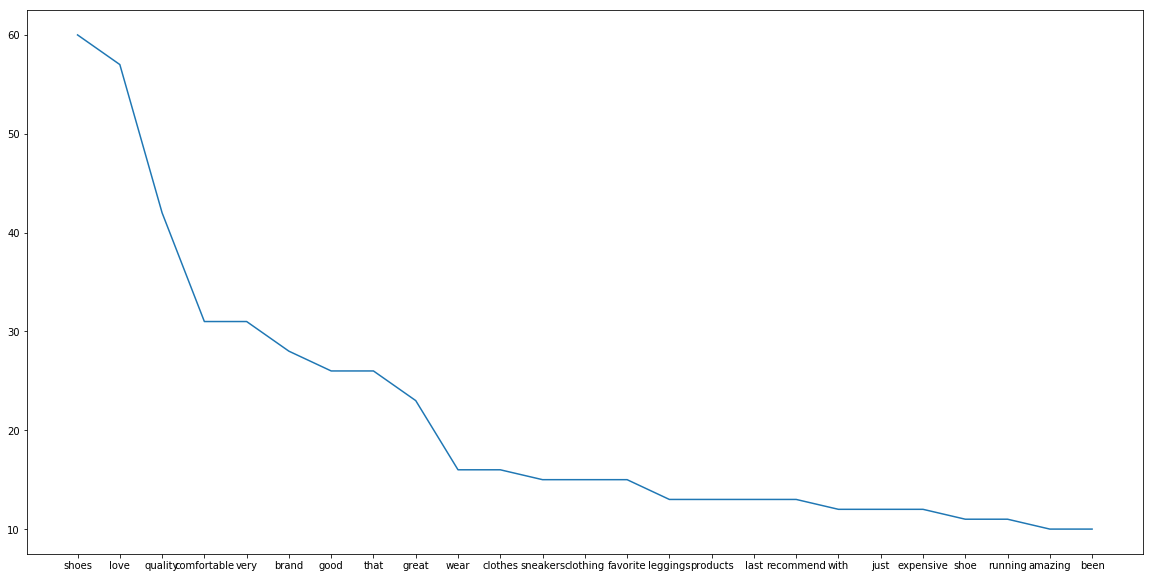

In [249]:
#plot most frequent words
import matplotlib.pyplot as plt
import numpy as np
x=word_plot['word']
y=word_plot['freq']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

In [250]:
#create a list of bigrams
bigrams = nltk.bigrams(" ".join(df2['Review']).split(" "))
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)

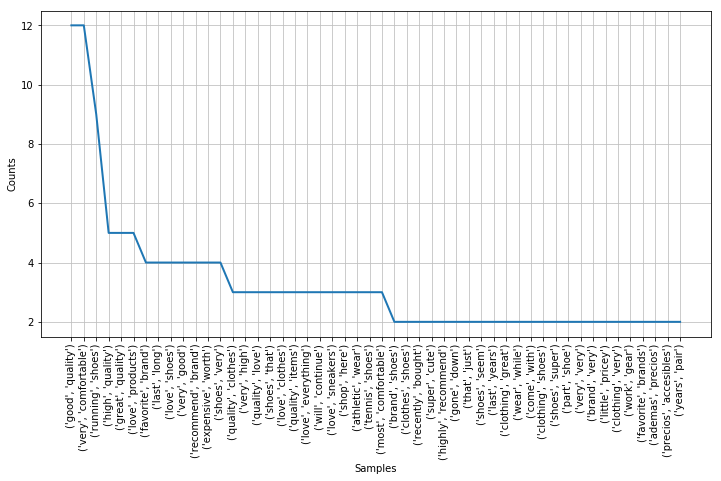

In [251]:
#plot bigrams
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

(-0.5, 399.5, 199.5, -0.5)

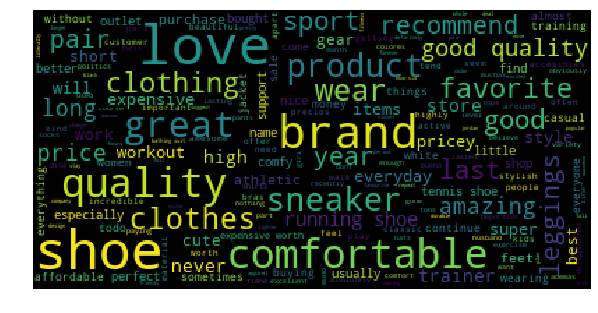

In [256]:
#create a word cloud
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


stopwords = set(STOPWORDS)
stopwords.add("nike")

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=stopwords).generate(' '.join(df2['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

# Star Ratings from Reviews

In [275]:
# import text data (csv) as a dataframe

import re
import pandas as pd

import nltk
from nltk.corpus import stopwords

df3 = pd.read_csv("nike_reviews2.csv", header=None)
df3.head(5)

,0
0,5
1,none
2,4
3,5
4,5


#### Average Star rating on reviews was a whopping 4.70 out of 5 

# Section 9: Storytelling

Nike’s main use for Twitter is for Customer Interactions & Advertising. They offer a wide variety of products, but their shoes are still the most talked about. Reviews are very positive towards Nike; customers love their products and this should be something that Nike should be proud of. However, with a larger set of data, ranging over multiple sources, Nike could be able to better define what products give their customers the highest satisfaction, while also learning what they need to improve upon! By using different sources of data, some potential biases could be eliminated in the process (some websites could be paid by Nike to have positive reviews). More sources will allow for a better data analysis and more insights could be drawn from the data. 

We found it interesting that no known Athletes appeared during our Twitter analysis. With so many players now-a-days being sponsored by Nike, we thought that some potential athletes would Tweet or Retweet stuff about Nike more frequently (that wasn't the case). 

We thought that the Bigrams were some of the most important pieces of information because it gave insights to how the customers felt about Nike. Having a much bigger data set would be useful to further advance the accuracy of these Bigrams.